In [4]:
from model import *

# Prepare Dataset

In [5]:
names = locals()
for w in ['005','01','015','02']:
    names['dataFile_e2'+str(w)] = '.\Simulator\C_Easy2_noise'+ str(w)+'.mat'
    names['dataFile_e1'+str(w)] = '.\Simulator\C_Easy1_noise'+ str(w)+'.mat'
    names['dataFile_d1'+str(w)] = '.\Simulator\C_Difficult1_noise'+ str(w)+'.mat'
    names['dataFile_d2'+str(w)] = '.\Simulator\C_Difficult2_noise'+ str(w)+'.mat'# path is needed to be changed
    names['data_e1'+str(w)],names['data_e2'+str(w)],names['data_d1'+str(w)],names['data_d2'+str(w)] = scio.loadmat(names['dataFile_e1'+str(w)]),scio.loadmat(names['dataFile_e2'+str(w)]),scio.loadmat(names['dataFile_d1'+str(w)]),scio.loadmat(names['dataFile_d2'+str(w)])
    names['spikes_e1'+str(w)],names['spikes_e2'+str(w)],names['spikes_d1'+str(w)],names['spikes_d2'+str(w)] =  names['data_e1'+str(w)]['data'][0], names['data_e2'+str(w)]['data'][0],names['data_d1'+str(w)]['data'][0],names['data_d2'+str(w)]['data'][0]
    names['index_e1'+str(w)] = names['index_e2'+str(w)] = names['index_d1'+str(w)] = names['index_d2'+str(w)] = np.array(range(len(names['spikes_e2'+str(w)])))
    for i in ['_e1','_e2','_d1','_d2']:
        names['min'+str(i)+str(w)],names['max'+str(i)+str(w)] = names['spikes'+str(i)+str(w)].min(), names['spikes'+str(i)+str(w)].max()
        names['maxvalue'+str(i)+str(w)] = max(abs(names['min'+str(i)+str(w)]),names['max'+str(i)+str(w)])
        names['spikes_nor'+str(i)+str(w)] = (names['spikes'+str(i)+str(w)])/names['maxvalue'+str(i)+str(w)]

In [6]:
## Get The Different Resolutions
for w in ['005','01','015','02']:
    for j in ['3','4','5','6','7','8','10']:
        for i in ['_e1','_e2','_d1','_d2']:
            names['spikes'+str(i)+'_rs_' + str(j)+str(w)] = np.around(names['spikes_nor'+str(i)+str(w)] * pow(2,int(j)-1))
            #names['spikes'+str(i)+'_rs_' + str(j)+str(w)] -= np.mean(names['spikes'+str(i)+'_rs_' + str(j)+str(w)])

In [ ]:
fact = 24
best_params = []
best_scores = []
noise = [0.05,0.1,0.15,0.2]
thresholds = (np.array(noise)*0.2990+0.019)
for ind,w in enumerate(tqdm(['005','01','015','02'])):
    best_params_res= []
    for t,i in enumerate(tqdm(['3','4','5','6','7','8','10'])):
        resolution_res = []
        for j in ['e1','e2','d1','d2']:
            spike_times = names['data_'+j+str(w)]['spike_times'][0][0][0]
            signal = np.array(names['spikes_'+str(j)+'_rs_'+str(i)+str(w)])/(2**(int(i)-2))
            sigma = np.std(signal)
            signals = list(map(lambda x: signal[x+15:x+40],spike_times))
            features= [feature_extraction(signal,factor('24')) for signal in signals]
            gt = names['data_'+j+str(w)]['spike_class'][0][0][0]
            scores = []
            l1_params ={
                'distance':l2,
                'thresh':thresh_calc(sigma,'24'),
            }
            for loop in range(5):
                l1_score = train_predict(l1_params,features,gt,approx_update,False)
                print(l1_score)
                scores.append(l1_score)
            resolution_res.append(scores)

        best_params_res.append(resolution_res)
    best_scores.append(best_params_res)

C:\Users\morta\anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


0.6870554765291608
0.6273115220483642
0.6642958748221907
0.6955903271692745
0.6770981507823614
0.7800586510263929
0.7228739002932552
0.7800586510263929
0.7478005865102639
0.7624633431085044
0.44903988183161003
0.4239290989660266
0.44165435745937964
0.4342688330871492
0.4431314623338257
0.6686478454680534
0.6671619613670133
0.6537890044576523
0.6835066864784547
0.674591381872214
0.8165007112375533
0.8307254623044097
0.817923186344239
0.786628733997155
0.8079658605974396
0.6642228739002932
0.5703812316715543
0.6994134897360704
0.7272727272727273
0.6231671554252199
0.4519940915805022
0.4327917282127031
0.4534711964549483
0.465288035450517
0.4239290989660266
0.6641901931649331
0.6315007429420505
0.6805349182763745
0.6953937592867756
0.6196136701337296
0.8321479374110953
0.7183499288762447
0.7439544807965861
0.6458036984352774
0.7695590327169275
0.7316715542521994
0.5689149560117303
0.7287390029325513
0.6363636363636364
0.5835777126099707
0.49926144756277696
0.5125553914327917
0.55539143279

In [38]:
values = np.mean(np.array
                 (best_scores),axis=3)[1]
stes = (np.std(np.array(best_scores)*100,axis=3).T/np.sqrt(20))[1]
stes

array([[0.50088929, 0.37386231, 0.32397883, 0.41623543],
       [1.20290359, 0.81748825, 0.68861546, 0.44562446],
       [2.23647838, 2.57927862, 2.04578346, 2.33320721],
       [1.67498731, 0.89707637, 0.82813766, 0.87124299],
       [0.08674604, 0.51778199, 0.07925252, 0.08227194],
       [0.08935564, 0.09260231, 0.55719673, 0.68055031],
       [0.22539667, 0.22445879, 0.76908585, 0.41397592]])

In [39]:
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"

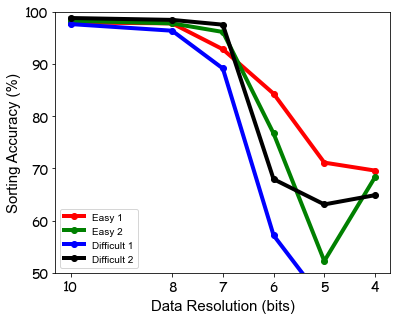

In [45]:
plt.figure(figsize=(6,4.8))
resolutions= [4,5,6,7,8,10]
titles = ['Easy 1','Easy 2', 'Difficult 1','Difficult 2']

for i in range(4):
    plt.plot(resolutions,values[:-1,i]*100,color = 'rgbk'[i],marker='o',markersize=6,linewidth = '4',label=titles[i])
plt.ylim(50,100)
plt.gca().invert_xaxis()
plt.xticks(resolutions,size = 14)
plt.yticks(size = 14)
plt.xlabel('Data Resolution (bits)',fontsize=15,fontname="Arial")
plt.ylabel('Sorting Accuracy (%)',fontsize=15,fontname="Arial")
plt.legend(loc='lower left',prop={'family': 'Arial'})
plt.savefig('ResolutionVSAccuracy.png',dpi=400, transparent=True,bbox_inches = 'tight')
